- The dataset contains 43 different classes of images. 
- Classes are as listed below: 

    - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
    - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
    - ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
    - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
    - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
    - (10, b'No passing for vehicles over 3.5 metric tons')
    - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
    - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
    - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
    - (18, b'General caution') (19, b'Dangerous curve to the left')
    - (20, b'Dangerous curve to the right') (21, b'Double curve')
    - (22, b'Bumpy road') (23, b'Slippery road')
    - (24, b'Road narrows on the right') (25, b'Road work')
    - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
    - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
    - (31, b'Wild animals crossing')
    - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
    - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
    - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
    - (40, b'Roundabout mandatory') (41, b'End of no passing')
    - (42, b'End of no passing by vehicles over 3.5 metric tons')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings("ignore")
import tensorflow as tf
import pickle as pk

In [2]:
with open("traffic-signs-data/train.p", "rb") as f:
    train = pk.load(f)
    
with open("traffic-signs-data/valid.p", "rb") as w:
    valid = pk.load(w)
    
with open("traffic-signs-data/test.p", "rb") as s:
    test = pk.load(s)

In [3]:
X_train, y_train = train["features"], train["labels"]
X_valid, y_valid = valid["features"], valid["labels"]
X_test, y_test = test["features"], test["labels"]

In [4]:
X_train.shape,y_train.shape

((34799, 32, 32, 3), (34799,))

--------------

0


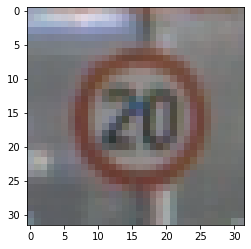

In [5]:
i = 9999
plt.imshow(X_train[i]);
print(y_train[i])

-------------

In [6]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [7]:
X_train_gray =  np.sum(X_train/3, axis=3, keepdims=True)
X_valid_gray = np.sum(X_valid/3, axis=3, keepdims=True) 
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)

In [8]:
X_train_gray.shape, X_valid_gray.shape

((34799, 32, 32, 1), (4410, 32, 32, 1))

In [9]:
# 1/255 --> value ranges from 0 to 1
# (X -128)/128 value ranges from -1 to 1

X_train_norm = (X_train_gray - 128)/128
X_valid_norm = (X_valid_gray - 128)/128
X_test_norm = (X_test_gray - 128)/128

In [10]:
print(f" The Max and Min values are: {X_train_norm.max(),X_train_norm.min()}")

 The Max and Min values are: (0.9921875, -0.9713541666666666)


Gray_scale


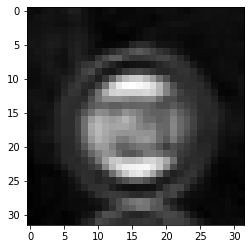

RGB scaled


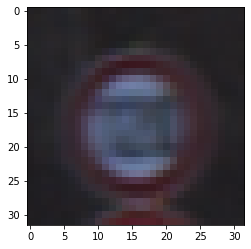

In [11]:
i = 619

print("Gray_scale")
plt.imshow(X_train_gray[i],cmap = "gray")
plt.show()
plt.figure()
plt.imshow(X_train[i],cmap = "gray")
print("RGB scaled")
plt.show()

In [12]:
# We can use skimage directly to convert rgb to grey
# when using color.rgb2grey ---> skimage automatically normalize to scale 0 to 1.

# from skimage import color
# X_train = color.rgb2grey(X_train)
# plt.imshow(X_train[999],cmap = "gray")
# X_train.shape

----------

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,AvgPool2D

In [14]:
X_train_norm[90].shape

(32, 32, 1)

In [15]:
model = Sequential(name= "LENET")

model.add(Conv2D(filters = 6,kernel_size=(5,5),activation= "relu", input_shape = (32,32,1)))
model.add(AvgPool2D())

model.add(Conv2D(filters = 16,kernel_size=(5,5),activation= "relu"))
model.add(AvgPool2D())

model.add(Flatten())
model.add(Dense(120,activation= "relu"))
model.add(Dense(84,activation= "relu"))
model.add(Dense(64,activation= "relu"))
model.add(Dense(43,activation= "softmax"))

In [16]:
model.summary()

Model: "LENET"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               48120 

In [17]:
model.compile(optimizer="adam",loss = "SparseCategoricalCrossentropy", metrics= ["accuracy"])

In [18]:
model.fit(x = X_train_norm, y = y_train, 
          validation_data= (X_valid_norm,y_valid), epochs = 20, batch_size = 64)

Epoch 1/20
544/544 [==============================] - 9s 15ms/step - loss: 1.6668 - accuracy: 0.5387 - val_loss: 0.7671 - val_accuracy: 0.7685
Epoch 2/20
544/544 [==============================] - 8s 15ms/step - loss: 0.4702 - accuracy: 0.8624 - val_loss: 0.5439 - val_accuracy: 0.8351
Epoch 3/20
544/544 [==============================] - 8s 14ms/step - loss: 0.2855 - accuracy: 0.9182 - val_loss: 0.4433 - val_accuracy: 0.8764
Epoch 4/20
544/544 [==============================] - 8s 15ms/step - loss: 0.2001 - accuracy: 0.9442 - val_loss: 0.3872 - val_accuracy: 0.8853
Epoch 5/20
544/544 [==============================] - 8s 15ms/step - loss: 0.1517 - accuracy: 0.9581 - val_loss: 0.4391 - val_accuracy: 0.8798
Epoch 6/20
544/544 [==============================] - 8s 16ms/step - loss: 0.1150 - accuracy: 0.9681 - val_loss: 0.4594 - val_accuracy: 0.8705
Epoch 7/20
544/544 [==============================] - 9s 16ms/step - loss: 0.0950 - accuracy: 0.9724 - val_loss: 0.3644 - val_accuracy: 0.8984

In [19]:
results = model.evaluate(X_test_norm,y_test)

395/395 [==============================] - 2s 6ms/step - loss: 0.9376 - accuracy: 0.8967


In [23]:
print(f" Test loss = {results[0]} and Test accuracy = {results[1]}")

 Test loss = 0.9375581741333008 and Test accuracy = 0.8966745734214783
